<a href="https://colab.research.google.com/github/hana-dool/2021_Dacon_Classification/blob/master/Baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **데이터 불러오기**

In [166]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [167]:
import os
os.chdir('/content/drive/MyDrive/2101_Dacon_Classification')

In [64]:
import pandas as pd
import numpy as np

train=pd.read_csv('data/train_features.csv')
train_labels=pd.read_csv('data/train_labels.csv')
test=pd.read_csv('data/test_features.csv')
submission=pd.read_csv('data/sample_submission.csv')

In [180]:
from tensorflow.keras.layers import Dense, Dropout, Activation,BatchNormalization
from keras.layers import GRU, LSTM

# **데이터 살펴보기**

In [84]:
train

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234
...,...,...,...,...,...,...,...,...
1874995,3124,595,-0.712530,-0.658357,0.293707,-29.367857,-104.013664,-76.290437
1874996,3124,596,-0.683037,-0.658466,0.329223,-30.149089,-101.796809,-76.625087
1874997,3124,597,-0.664730,-0.666625,0.364114,-27.873095,-98.776072,-79.365125
1874998,3124,598,-0.630534,-0.682565,0.373696,-23.636550,-99.139495,-80.259478


In [91]:
train

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234
...,...,...,...,...,...,...,...,...
1874995,3124,595,-0.712530,-0.658357,0.293707,-29.367857,-104.013664,-76.290437
1874996,3124,596,-0.683037,-0.658466,0.329223,-30.149089,-101.796809,-76.625087
1874997,3124,597,-0.664730,-0.666625,0.364114,-27.873095,-98.776072,-79.365125
1874998,3124,598,-0.630534,-0.682565,0.373696,-23.636550,-99.139495,-80.259478


In [103]:
import matplotlib.pyplot as plt

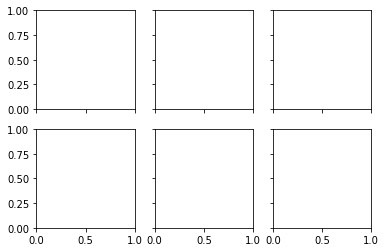

In [104]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')
ax

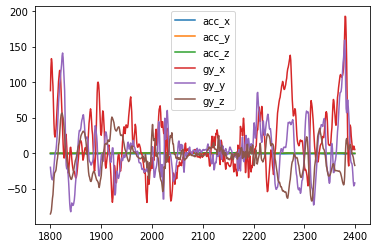

In [105]:
train[train['id']==3].iloc[:,2:].plot()

In [121]:
import random

In [140]:
train_labels['label_desc'].unique()

array(['Shoulder Press (dumbbell)', 'Non-Exercise', 'Biceps Curl (band)',
       'Side Plank Right side', 'Plank', 'Chest Press (rack)',
       'Wall Squat', 'Russian Twist', 'Running (treadmill)',
       'Pushup (knee or foot variation)', 'Wall Ball',
       'Dynamic Stretch (at your own pace)',
       'Sit-up (hands positioned behind head)', 'Tap Right Device',
       'Static Stretch (at your own pace)', 'Device on Table',
       'Triceps extension (lying down)', 'Elliptical machine', 'Burpee',
       'Walking lunge', 'Lateral Raise', 'Jump Rope',
       'Triceps Kickback (knee on bench) (label spans both arms)',
       'Medicine Ball Slam',
       'Lunge (alternating both legs, weight optional)',
       'Fast Alternating Punches', 'Static stretch',
       'Squat Rack Shoulder Press', 'Overhead Triceps Extension',
       'Seated Back Fly', 'Bicep Curl', 'Side Plank Left side',
       'Dumbbell Squat (hands at side)', 'Dumbbell Deadlift Row',
       'Two-arm Dumbbell Curl (both arms, 

In [153]:
train.columns[2:]

Index(['acc_x', 'acc_y', 'acc_z', 'gy_x', 'gy_y', 'gy_z'], dtype='object')

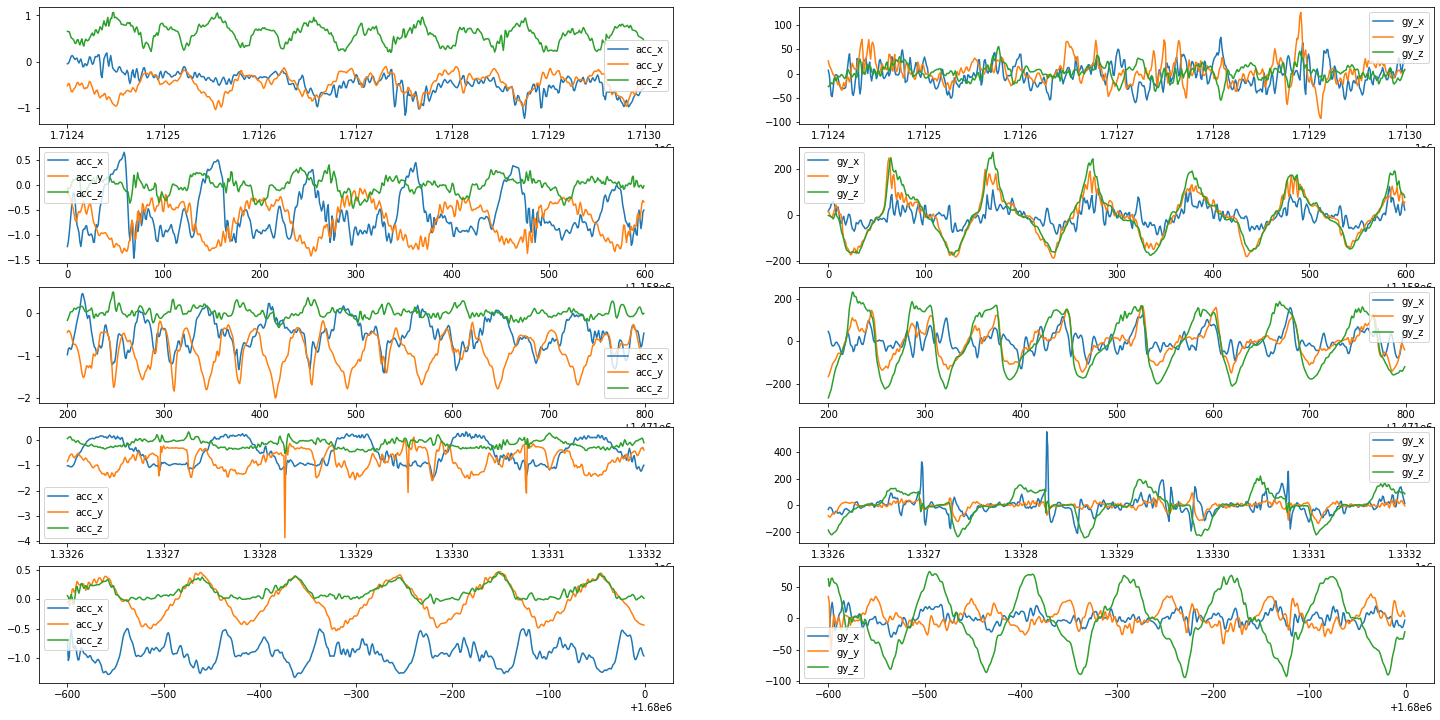

In [162]:
plt.figure(figsize= (25,15))
for i in range(0,5) :
    plt.subplot(6,2,2*i+1)
    idx = random.choice(list(train_labels[train_labels['label_desc'] == 'Squat']['id']))
    plt.plot(train[train['id']==idx].iloc[:,2:5])
    plt.legend(train.columns[2:5])
    plt.subplot(6,2,2*i+2)
    plt.plot(train[train['id']==idx].iloc[:,5:])
    plt.legend(train.columns[5:])

In [67]:
train

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234
...,...,...,...,...,...,...,...,...
1874995,3124,595,-0.712530,-0.658357,0.293707,-29.367857,-104.013664,-76.290437
1874996,3124,596,-0.683037,-0.658466,0.329223,-30.149089,-101.796809,-76.625087
1874997,3124,597,-0.664730,-0.666625,0.364114,-27.873095,-98.776072,-79.365125
1874998,3124,598,-0.630534,-0.682565,0.373696,-23.636550,-99.139495,-80.259478


In [6]:
#id 별로 각각 600개의 데이터가 있음을 확인   
train['id'].value_counts()

2047    600
1347    600
2378    600
1354    600
2379    600
       ... 
1699    600
675     600
2722    600
1698    600
0       600
Name: id, Length: 3125, dtype: int64

In [7]:
#train_labels.csv 에서 id 가 수행한 동작과 그에 따른 label값을 확인
train_labels

,id,label,label_desc
0,0,37,Shoulder Press (dumbbell)
1,1,26,Non-Exercise
2,2,3,Biceps Curl (band)
3,3,26,Non-Exercise
4,4,26,Non-Exercise
...,...,...,...
3120,3120,26,Non-Exercise
3121,3121,26,Non-Exercise
3122,3122,15,Dynamic Stretch (at your own pace)
3123,3123,26,Non-Exercise


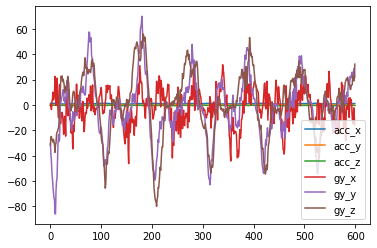

In [8]:
#id 별 동작들의 흐름 살펴보기
ex=train[train['id']==0]
ex.iloc[:,2:].plot()

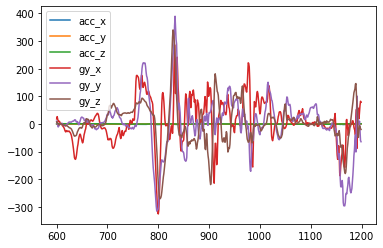

In [9]:
ex=train[train['id']==1]
ex.iloc[:,2:].plot()

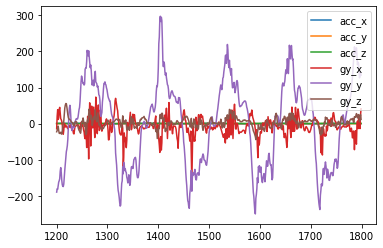

In [10]:
ex=train[train['id']==2]
ex.iloc[:,2:].plot()

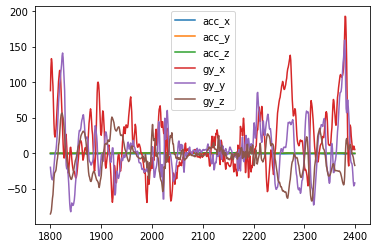

In [11]:
ex=train[train['id']==3]
ex.iloc[:,2:].plot()

In [12]:
#test'id'는 782개 
test['id'].nunique()

782

In [13]:
#782개의 id 별 동작 데이터를 활용해 각각의id가 어떤 동작인지를 분류하는 문제!!
submission

,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,3125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3126,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3127,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
778,3903,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
779,3904,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
780,3905,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **라이브러리 불러오기**

In [21]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

# **데이터 수정**

In [15]:
X=tf.reshape(np.array(train.iloc[:,2:]),[-1, 600, 6])
X.shape

TensorShape([3125, 600, 6])

In [16]:
y = tf.keras.utils.to_categorical(train_labels['label']) 
y.shape

(3125, 61)

# Modeling

## LSTM (Baseline)

In [174]:
model1 = Sequential()
model1.add(LSTM(64, input_shape=(600,6)))
model1.add(Dense(61, activation='softmax'))
model1.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = keras.callbacks.EarlyStopping(patience=16, #16을 줘보자.
                                             restore_best_weights=True)
history1 = model1.fit(X, y, 
                        epochs=120,
                     batch_size = 16,
                        validation_split=0.2,
                        callbacks=[early_stopping])

Epoch 1/120
157/157 [==============================] - 5s 24ms/step - loss: 3.7757 - accuracy: 0.2102 - val_loss: 2.6670 - val_accuracy: 0.4976
Epoch 2/120
157/157 [==============================] - 3s 22ms/step - loss: 2.6460 - accuracy: 0.4789 - val_loss: 2.5404 - val_accuracy: 0.5072
Epoch 3/120
157/157 [==============================] - 3s 22ms/step - loss: 2.5385 - accuracy: 0.4773 - val_loss: 2.4932 - val_accuracy: 0.5088
Epoch 4/120
157/157 [==============================] - 3s 22ms/step - loss: 2.3639 - accuracy: 0.4932 - val_loss: 2.4678 - val_accuracy: 0.5104
Epoch 5/120
157/157 [==============================] - 3s 22ms/step - loss: 2.2624 - accuracy: 0.5170 - val_loss: 2.4147 - val_accuracy: 0.5088
Epoch 6/120
157/157 [==============================] - 4s 22ms/step - loss: 2.1744 - accuracy: 0.5149 - val_loss: 2.3987 - val_accuracy: 0.5056
Epoch 7/120
157/157 [==============================] - 4s 22ms/step - loss: 2.1701 - accuracy: 0.5010 - val_loss: 2.3726 - val_accuracy:

## LSTM with relu

In [175]:
#가벼운 모델 생성
model2 = Sequential()
model2.add(LSTM(64, input_shape=(600,6)))
model2.add(Dense(100,activation='relu'))
model2.add(Dense(61, activation='softmax'))
model2.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = keras.callbacks.EarlyStopping(patience=16, #16을 줘보자.
                                             restore_best_weights=True)
history1 = model2.fit(X, y, 
                        epochs=120,
                     batch_size = 16,
                        validation_split=0.2,
                        callbacks=[early_stopping])

Epoch 1/120
157/157 [==============================] - 5s 25ms/step - loss: 3.4548 - accuracy: 0.3191 - val_loss: 2.6355 - val_accuracy: 0.4976
Epoch 2/120
157/157 [==============================] - 3s 22ms/step - loss: 2.5718 - accuracy: 0.4853 - val_loss: 2.4801 - val_accuracy: 0.5072
Epoch 3/120
157/157 [==============================] - 3s 22ms/step - loss: 2.3714 - accuracy: 0.4932 - val_loss: 2.4006 - val_accuracy: 0.5056
Epoch 4/120
157/157 [==============================] - 3s 22ms/step - loss: 2.2835 - accuracy: 0.4820 - val_loss: 2.3451 - val_accuracy: 0.5168
Epoch 5/120
157/157 [==============================] - 3s 22ms/step - loss: 2.0919 - accuracy: 0.5063 - val_loss: 2.3497 - val_accuracy: 0.5008
Epoch 6/120
157/157 [==============================] - 3s 22ms/step - loss: 2.0545 - accuracy: 0.4984 - val_loss: 2.3067 - val_accuracy: 0.5216
Epoch 7/120
157/157 [==============================] - 3s 22ms/step - loss: 1.9102 - accuracy: 0.5132 - val_loss: 2.3129 - val_accuracy:

## GRU

In [183]:
def gru_model():
    model=Sequential()
    model.add(GRU(64, input_shape = (600,6)))
    model.add(Dense(61, activation='softmax'))
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
model = gru_model()
early_stopping = keras.callbacks.EarlyStopping(patience=16, #16을 줘보자.
                                             restore_best_weights=True)
history = model.fit(X, y, 
                        epochs=120,
                     batch_size = 16,
                        validation_split=0.2,
                        callbacks=[early_stopping])

Epoch 1/120
157/157 [==============================] - 5s 23ms/step - loss: 3.8752 - accuracy: 0.1765 - val_loss: 2.7659 - val_accuracy: 0.4976
Epoch 2/120
157/157 [==============================] - 3s 21ms/step - loss: 2.6853 - accuracy: 0.4789 - val_loss: 2.6036 - val_accuracy: 0.4944
Epoch 3/120
157/157 [==============================] - 3s 21ms/step - loss: 2.4555 - accuracy: 0.4925 - val_loss: 2.5063 - val_accuracy: 0.5040
Epoch 4/120
157/157 [==============================] - 3s 21ms/step - loss: 2.2854 - accuracy: 0.5206 - val_loss: 2.4445 - val_accuracy: 0.5136
Epoch 5/120
157/157 [==============================] - 3s 21ms/step - loss: 2.2254 - accuracy: 0.5086 - val_loss: 2.3665 - val_accuracy: 0.5216
Epoch 6/120
157/157 [==============================] - 3s 21ms/step - loss: 2.1845 - accuracy: 0.5006 - val_loss: 2.3222 - val_accuracy: 0.5296
Epoch 7/120
157/157 [==============================] - 3s 21ms/step - loss: 2.0856 - accuracy: 0.5091 - val_loss: 2.2581 - val_accuracy:

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(patience=16, #16을 줘보자.
                                             restore_best_weights=True)
history1 = model1.fit(X_train_, y_train_, 
                        epochs=160,
                        validation_data=(X_valid_, y_valid_),
                        callbacks=[checkpoint,early_stopping])
model1 = keras.models.load_model(filepath = "model1.h5")
evaluation1 = model1.evaluate(X_test, y_test) 


In [50]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
test_X.shape

TensorShape([782, 600, 6])

In [53]:
prediction=model.predict(test_X)

In [54]:
prediction.shape

(782, 61)

# **제출**

In [55]:
submission

,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,3125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3126,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3127,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
778,3903,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
779,3904,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
780,3905,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
submission.iloc[:,1:]=prediction

In [57]:
submission

,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,3125,0.002807,0.000230,0.002025,0.002032,0.005155,0.000307,0.000888,0.000359,0.000087,0.210778,0.166137,0.022122,0.008103,0.007160,0.019425,0.000068,0.000494,0.000049,0.000219,1.809445e-05,0.000171,0.001937,0.000300,0.001947,0.094505,0.000154,0.133907,0.000033,0.000030,0.003167,0.039029,0.144183,0.001790,0.001760,0.009033,0.000055,0.002122,0.000168,0.004503,0.000410,0.000019,0.000035,0.000544,0.017270,0.003128,0.001890,0.000225,0.001787,0.000880,0.009722,0.008085,0.000938,0.005705,0.000639,0.005294,0.000142,0.000514,0.003372,0.050905,0.000035,0.001206
1,3126,0.000172,0.001896,0.000005,0.000023,0.000767,0.000087,0.000027,0.001635,0.000038,0.005232,0.000194,0.000251,0.000003,0.000524,0.000315,0.000054,0.000085,0.000030,0.000074,1.274447e-07,0.000018,0.000152,0.000666,0.000259,0.002184,0.000032,0.976563,0.000027,0.000005,0.000005,0.000104,0.000540,0.000134,0.001501,0.000042,0.000037,0.000035,0.000019,0.000001,0.000011,0.000317,0.000107,0.000044,0.000073,0.000409,0.000391,0.000219,0.000025,0.000154,0.001009,0.001357,0.000007,0.000004,0.000007,0.000004,0.000011,0.000032,0.001795,0.000048,0.000075,0.000164
2,3127,0.002666,0.006950,0.000149,0.000056,0.008498,0.002129,0.011506,0.012291,0.000074,0.003485,0.007320,0.000396,0.000278,0.000100,0.002552,0.000694,0.003446,0.000951,0.000024,6.585061e-04,0.000295,0.000692,0.000220,0.001130,0.002312,0.004386,0.295164,0.001282,0.000276,0.004318,0.000383,0.004533,0.000496,0.004017,0.000559,0.000094,0.000439,0.494578,0.006548,0.001023,0.005213,0.004843,0.014811,0.010125,0.002756,0.020176,0.000674,0.018038,0.009314,0.004932,0.003331,0.001957,0.000266,0.000028,0.001000,0.000214,0.001583,0.001226,0.001378,0.010932,0.000233
3,3128,0.000698,0.000013,0.000062,0.000179,0.000199,0.000360,0.000009,0.001364,0.000149,0.010193,0.036062,0.005326,0.007907,0.004298,0.008268,0.000111,0.000018,0.000013,0.000007,1.368462e-05,0.000007,0.000801,0.000048,0.001012,0.077653,0.000114,0.742370,0.000002,0.000018,0.004851,0.000674,0.004666,0.005880,0.000700,0.001859,0.000007,0.000134,0.000025,0.032613,0.001019,0.000027,0.000014,0.000274,0.010495,0.003078,0.003715,0.000059,0.000100,0.004755,0.005163,0.003840,0.001352,0.007066,0.000066,0.000107,0.000336,0.000013,0.001500,0.003685,0.000001,0.004651
4,3129,0.000152,0.001267,0.000098,0.000027,0.000025,0.000037,0.000261,0.000136,0.000331,0.000291,0.000559,0.000651,0.000021,0.000005,0.000821,0.007505,0.000074,0.000048,0.000068,5.845520e-05,0.000228,0.000126,0.000859,0.001279,0.000069,0.000064,0.946603,0.000145,0.000114,0.000013,0.000091,0.000128,0.000257,0.005105,0.000367,0.005819,0.002030,0.003747,0.000003,0.000050,0.000043,0.000644,0.000164,0.000060,0.000260,0.000322,0.000321,0.000851,0.002346,0.002467,0.008955,0.002064,0.000018,0.000020,0.000034,0.000998,0.000078,0.000260,0.000024,0.000369,0.000172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,0.001539,0.003309,0.000181,0.000549,0.004352,0.001054,0.009987,0.000649,0.000145,0.000786,0.000905,0.001409,0.000266,0.000438,0.001042,0.000830,0.003296,0.000868,0.000456,4.042873e-04,0.000808,0.002374,0.001004,0.001883,0.001215,0.039429,0.594932,0.000377,0.000154,0.003474,0.001985,0.003625,0.000072,0.003352,0.004775,0.008367,0.000518,0.061365,0.000056,0.000426,0.035549,0.000895,0.001645,0.005087,0.003335,0.031611,0.000722,0.004342,0.000727,0.002566,0.019782,0.000223,0.000177,0.000113,0.005091,0.001592,0.003843,0.005364,0.000332,0.113590,0.000756
778,3903,0.018752,0.008544,0.000181,0.000356,0.019081,0.002760,0.001329,0.046433,0.000593,0.001473,0.008909,0.001552,0.000514,0.000627,0.007949,0.005826,0.017943,0.120636,0.025569,2.820257e-03,0.005119,0.00711

In [61]:
submission.to_csv('./Submission/submission1.csv', index=False)